In [1]:
# hide
# default_exp model_fitting

from nbdev.showdoc import *

# InstanceCMR - Two List Lengths
Now that relevant dependencies are specified and testing, we'll jump right into fitting the model to larger portions of the dataset. This time, we'll do both the 20-item and 30-item list length subsets of the Murdock (1962) dataset.

## Load Data

In [2]:
from instance_cmr.datasets import prepare_murddata
from instance_cmr.model_fitting import icmr_murd_likelihood
from instance_cmr.model_fitting import icmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import InstanceCMR
import numpy as np

murd_trials0, murd_events0, murd_length0 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 0)
print(murd_length0, np.shape(murd_trials0))

murd_trials1, murd_events1, murd_length1 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 1)
print(murd_length1, np.shape(murd_trials1))

murd_events1.head()

20 (1200, 15)
30 (1200, 15)


,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,NaN,True,False,0,False
1,1,1,2,2,NaN,True,False,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Free Echo-Based Sensitivity

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0, murd_trials1]), 
    {'item_counts': List([murd_length0, murd_length1]),
     'context_sensitivity': 1, 'feature_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 50265.02395235836
     jac: array([ -1.73604348,   2.92493496,  -0.04147296,   8.66639311,
       -27.39980105,  -0.53987606,  -2.74303604,  -4.82177714,
         5.50426193,  -0.97061275,   8.52160161])
 message: 'Optimization terminated successfully.'
    nfev: 12174
     nit: 61
 success: True
       x: array([0.69979554, 0.02090891, 0.83582005, 0.00916919, 1.        ,
       0.13541901, 6.73136456, 2.0293467 , 0.02650851, 0.25284696,
       1.89883789])
```

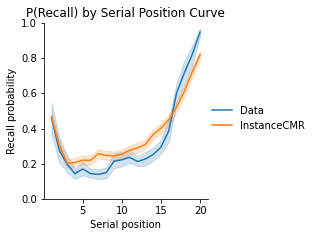

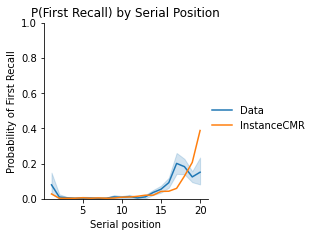

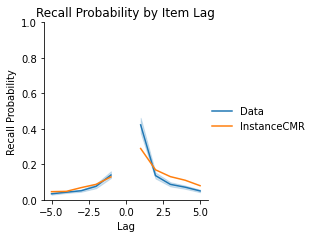

In [4]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

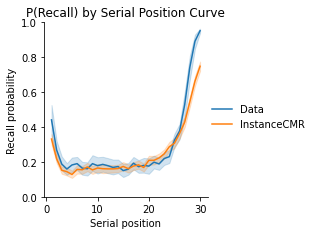

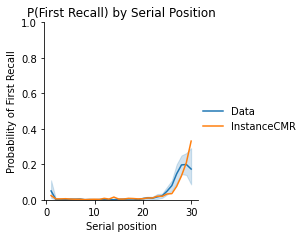

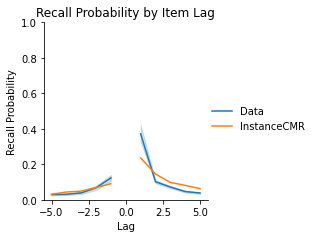

In [5]:
parameters = {
    'item_count':murd_length1,
    'presentation_count': murd_length1,
    'context_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events1, 'subject > -1', experiment_count=1000, savefig=True)

## Free C-F Trace-Based Sensitivity

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'feature_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0, murd_trials1]), 
    {'item_counts': List([murd_length0, murd_length1]),
     'context_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
    fun: 50456.27859605974
     jac: array([  0.43291948,   2.24099495,   8.05885061,  17.612183  ,
       -54.4547217 , -17.5110472 ,   2.15950404,   0.        ,
         4.85306373,  -1.00553734,   1.59197954])
 message: 'Optimization terminated successfully.'
    nfev: 9837
     nit: 52
 success: True
       x: array([7.87816627e-01, 4.76307824e-03, 8.88045108e-01, 1.99308768e-03,
       7.96088110e-01, 1.04319492e-01, 1.25255503e+01, 4.34932133e+01,
       2.65080331e-02, 2.52848327e-01, 1.04658271e+00])
```

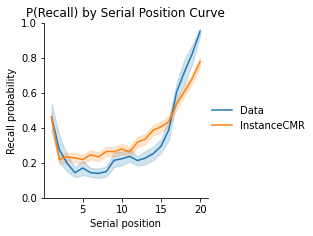

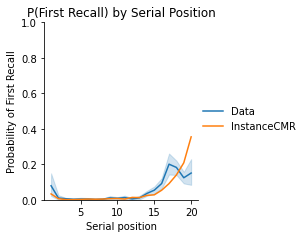

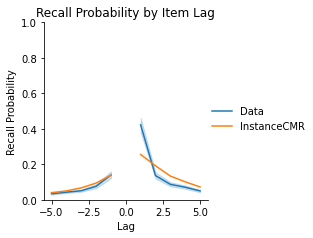

In [7]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

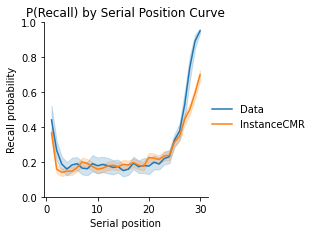

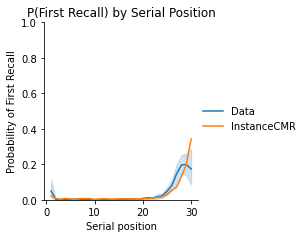

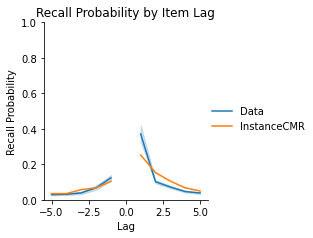

In [8]:
parameters = {
    'item_count':murd_length1,
    'presentation_count': murd_length1,
    'context_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events1, 'subject > -1', experiment_count=1000, savefig=True)

## Single-Parameter Free Trace-Based Sensitivity

We want to make sure any difference between the trace-based and echo-based sensitivity parameters aren't because the former is responsible for both C->F and F->C transformations. Currently, when feature_sensitivity is held to 1.0, context_sensitivity organizes trace-based retrieval in either direction.

In [9]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'context_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0, murd_trials1]), 
    {'item_counts': List([murd_length0, murd_length1]),
     'feature_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

differential_evolution step 1: f(x)= 76280.1
differential_evolution step 2: f(x)= 76280.1
differential_evolution step 3: f(x)= 68559.3
differential_evolution step 4: f(x)= 64794.9
differential_evolution step 5: f(x)= 64794.9
differential_evolution step 6: f(x)= 64794.9
differential_evolution step 7: f(x)= 64794.9
differential_evolution step 8: f(x)= 63504.9
differential_evolution step 9: f(x)= 62530
differential_evolution step 10: f(x)= 62530
differential_evolution step 11: f(x)= 60374.6
differential_evolution step 12: f(x)= 58771.7
differential_evolution step 13: f(x)= 58771.7
differential_evolution step 14: f(x)= 58771.7
differential_evolution step 15: f(x)= 56463.1
differential_evolution step 16: f(x)= 56463.1
differential_evolution step 17: f(x)= 56463.1
differential_evolution step 18: f(x)= 56463.1
differential_evolution step 19: f(x)= 56463.1
differential_evolution step 20: f(x)= 56463.1
differential_evolution step 21: f(x)= 56463.1
differential_evolution step 22: f(x)= 55143.2
d

## Results
```
```

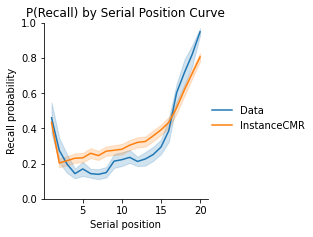

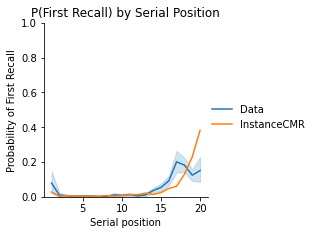

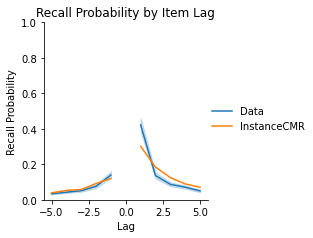

In [10]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'choice_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

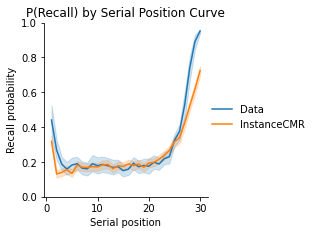

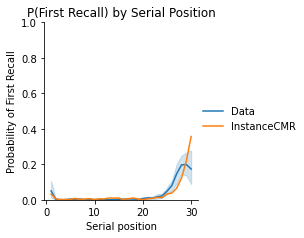

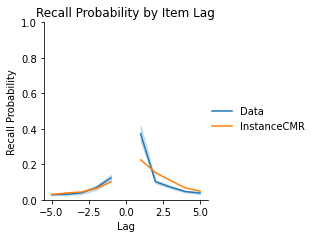

In [11]:
parameters = {
    'item_count':murd_length1,
    'presentation_count': murd_length1,
    'choice_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events1, 'subject > -1', experiment_count=1000, savefig=True)